In [17]:
import pandas as pd
import matplotlib.pyplot as plt
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [18]:
pumpkins.isnull().sum()

new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
pumpkins.head()

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.0,280.0
1,24 inch bins,5/6/17,270.0,280.0
2,24 inch bins,9/24/16,160.0,160.0
3,24 inch bins,9/24/16,160.0,160.0
4,24 inch bins,11/5/16,90.0,100.0


In [19]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2 #total price dibagi 2
month = pd.DatetimeIndex(pumpkins['Date']).month
print(price)

0       275.00
1       275.00
2       160.00
3       160.00
4        95.00
         ...  
1752     14.75
1753    275.00
1754    275.00
1755    275.00
1756    275.00
Length: 1757, dtype: float64


In [20]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})

print(new_pumpkins)

      Month        Package  Low Price  High Price   Price
0         4   24 inch bins     270.00      280.00  275.00
1         5   24 inch bins     270.00      280.00  275.00
2         9   24 inch bins     160.00      160.00  160.00
3         9   24 inch bins     160.00      160.00  160.00
4        11   24 inch bins      90.00      100.00   95.00
...     ...            ...        ...         ...     ...
1752      9  22 lb cartons      14.75       14.75   14.75
1753      9   36 inch bins     275.00      275.00  275.00
1754      9   36 inch bins     275.00      275.00  275.00
1755      9   36 inch bins     275.00      275.00  275.00
1756      9   36 inch bins     275.00      275.00  275.00

[1757 rows x 5 columns]


In [21]:
#kolom package aneh, kudu diubah dengan cara memisahkan tiap string dengan spasi buat dapetin porsi per nya itu
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
print(pumpkins)

                   Package     Date  Low Price  High Price
70    1 1/9 bushel cartons  9/24/16      15.00        15.0
71    1 1/9 bushel cartons  9/24/16      18.00        18.0
72    1 1/9 bushel cartons  10/1/16      18.00        18.0
73    1 1/9 bushel cartons  10/1/16      17.00        17.0
74    1 1/9 bushel cartons  10/8/16      15.00        15.0
...                    ...      ...        ...         ...
1738    1/2 bushel cartons  9/30/16      15.00        15.0
1739    1/2 bushel cartons  9/30/16      13.75        15.0
1740    1/2 bushel cartons  9/30/16      10.75        15.0
1741    1/2 bushel cartons  9/30/16      12.00        12.0
1742    1/2 bushel cartons  9/30/16      12.00        12.0

[415 rows x 4 columns]


In [22]:
# nah udah dapet
# kita dapetin porsi per nya itu lalu di normalisasikan ke bentuk angka yang sebenernya

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

print(new_pumpkins)

      Month        Package  Low Price  High Price   Price
0         4   24 inch bins     270.00      280.00  275.00
1         5   24 inch bins     270.00      280.00  275.00
2         9   24 inch bins     160.00      160.00  160.00
3         9   24 inch bins     160.00      160.00  160.00
4        11   24 inch bins      90.00      100.00   95.00
...     ...            ...        ...         ...     ...
1752      9  22 lb cartons      14.75       14.75   14.75
1753      9   36 inch bins     275.00      275.00  275.00
1754      9   36 inch bins     275.00      275.00  275.00
1755      9   36 inch bins     275.00      275.00  275.00
1756      9   36 inch bins     275.00      275.00  275.00

[1757 rows x 5 columns]


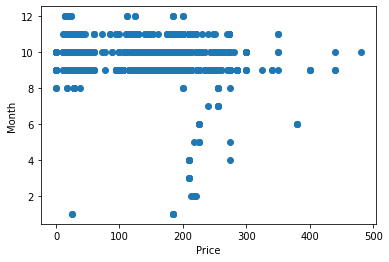

In [23]:
# Mengetahui variasi harga pumpkins per bulan dalam bentuk scatter
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.xlabel('Price')
plt.ylabel('Month')
plt.show()

#tapi kurang informatip, supaya lebih informatipppp

Text(0, 0.5, 'Pumpkin Price')

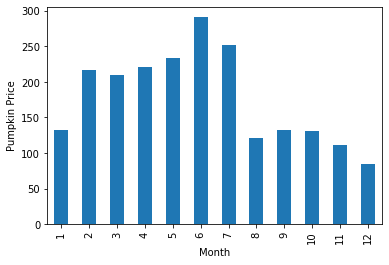

In [24]:
#dalam bentuk chart ajaaa, kita ketahui variasi harga pumpkins per bulannyaa
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Pumpkin Price')

In [28]:
from sklearn.preprocessing import LabelEncoder

new_pumpkins.iloc[:, 0:-1] = new_pumpkins.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)
# new_pumpkins.head()

print(new_pumpkins['Package'].corr(new_pumpkins['Price']))

0.3637674094245449
